# Neural Networks Visualization

Imports and setup

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add scripts folder to path
sys.path.append(os.path.abspath("../scripts"))

from activations import tanh, tanh_derivative, softmax
from layers import DenseLayer
from loss import cross_entropy_loss, cross_entropy_derivative
from network import SimpleNeuralNet

Try it with the iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data           # shape: (150, 4) — 4 features
y = iris.target.reshape(-1, 1)  # shape: (150, 1)

# One-hot encode the labels (3 classes)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Normalize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(
  X_scaled, y_encoded, test_size=0.2, random_state=42
)

Initialize and train network

In [ ]:
net = SimpleNeuralNet()
net.add(DenseLayer(4, 8, tanh, tanh_derivative, use_adam=True))
net.add(DenseLayer(8, 3, softmax, lambda x: 1, use_adam=True))

losses = []

epochs = 50
batch_size = 10
learning_rate = 0.01

for epoch in range(epochs):
    indices = np.random.permutation(len(x_train))
    x_train = x_train[indices]
    y_train = y_train[indices]

    epoch_loss = 0
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        output = net.forward(x_batch)
        loss = cross_entropy_loss(output, y_batch)
        grad = cross_entropy_derivative(output, y_batch)
        net.backward(grad, learning_rate)
        epoch_loss += loss

    avg_loss = epoch_loss / (len(x_train) / batch_size)
    losses.append(avg_loss)

print("Training complete.")

Training complete.


Plot training loss

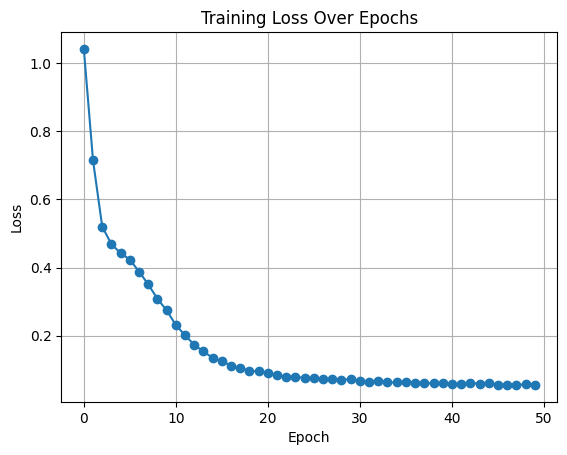

In [ ]:
plt.plot(losses, marker='o')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Check accuracy

In [ ]:
preds = net.forward(x_train)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_train, axis=1)

accuracy = np.mean(predicted_classes == true_classes)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 95.83%


Show a few predictions

In [ ]:
for i in range(5):
    print(f"Sample {i + 1}")
    print("Input:", x_train[i])
    print("Predicted:", preds[i])
    print("True Label:", y_train[i])
    print("-" * 30)

Sample 1
Input: [ 0.67450115 -0.36217625  0.30805885  0.13250973]
Predicted: [6.48164344e-04 9.98065751e-01 1.28608460e-03]
True Label: [0. 1. 0.]
------------------------------
Sample 2
Input: [-0.7795133   0.78880759 -1.34022653 -1.3154443 ]
Predicted: [9.98019014e-01 1.98088307e-03 1.02558530e-07]
True Label: [1. 0. 0.]
------------------------------
Sample 3
Input: [2.24968346 1.70959465 1.6721571  1.31719939]
Predicted: [1.22894370e-06 2.22722854e-03 9.97771543e-01]
True Label: [0. 0. 1.]
------------------------------
Sample 4
Input: [-0.65834543  1.47939788 -1.2833891  -1.3154443 ]
Predicted: [9.98158993e-01 1.84091183e-03 9.51710529e-08]
True Label: [1. 0. 0.]
------------------------------
Sample 5
Input: [-0.90068117  1.70959465 -1.22655167 -1.3154443 ]
Predicted: [9.98200941e-01 1.79896609e-03 9.30899494e-08]
True Label: [1. 0. 0.]
------------------------------


Visualize weights of first layer

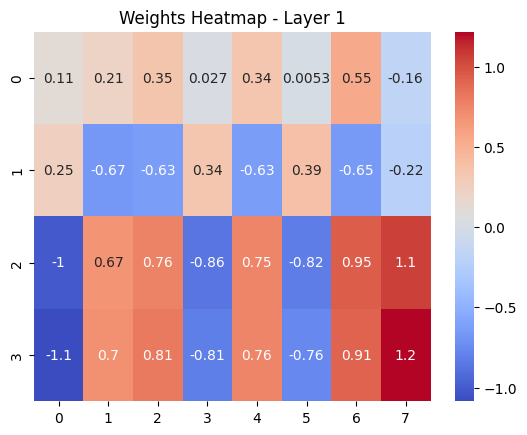

In [ ]:
weights = net.layers[0].weights

sns.heatmap(weights, annot=True, cmap="coolwarm")
plt.title("Weights Heatmap - Layer 1")
plt.show()